## Imports

In [1]:
pip install pyccel

     |████████████████████████████████| 350 kB 8.6 MB/s 
     |████████████████████████████████| 74 kB 3.1 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 


In [3]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [4]:
def solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                un[i,j] = u[i,j]
                vn[i,j] = v[i,j]
      
        for i in range(2, row):
            for j in range(2, col): 
                u[i-1, j-1] = (un[i-1, j-1] - dt / dx * un[i-1, j-1] * (un[i-1, j-1] - un[i-2, j-1]) - dt / dy *vn[i-1, j-1] * (un[i-1, j-1] - un[i-1, j-2]) +
                         nu * dt / dx**2 * (un[i, j-1] - 2 * un[i-1,j-1] + un[i-2, j-2]) + nu * dt / dy**2 * (un[i-1, j] - 2 * un[i-1, j-1] + un[i-2, j-2])) 

                v[i-1, j-1] = (vn[i-1, j-1] -dt / dx * un[i-1, j-1] * (vn[i-1, j-1]- vn[i-2, j-1]) -dt / dy * vn[i-1, j-1] * (vn[i-1, j-1]-vn[i-1, j-2]) + 
                               nu * dt / dx**2 * (vn[i, j-1] - 2 * vn[i-1, j-1] + vn[i-2, j-1]) + nu * dt / dy**2 *(vn[i-1, j] - 2 * vn[i-1, j-1] + vn[i-1, j-2])) 


    return 0

## Numba accelerator

In [5]:
#add the numba decorator to accelerate code
@njit(fastmath=True)
def solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu):
        
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                un[i,j] = u[i,j]
                vn[i,j] = v[i,j]
      
        for i in range(2, row):
            for j in range(2, col): 
                u[i-1, j-1] = (un[i-1, j-1] - dt / dx * un[i-1, j-1] * (un[i-1, j-1] - un[i-2, j-1]) - dt / dy *vn[i-1, j-1] * (un[i-1, j-1] - un[i-1, j-2]) +
                         nu * dt / dx**2 * (un[i, j-1] - 2 * un[i-1,j-1] + un[i-2, j-2]) + nu * dt / dy**2 * (un[i-1, j] - 2 * un[i-1, j-1] + un[i-2, j-2])) 

                v[i-1, j-1] = (vn[i-1, j-1] -dt / dx * un[i-1, j-1] * (vn[i-1, j-1]- vn[i-2, j-1]) -dt / dy * vn[i-1, j-1] * (vn[i-1, j-1]-vn[i-1, j-2]) + 
                               nu * dt / dx**2 * (vn[i, j-1] - 2 * vn[i-1, j-1] + vn[i-2, j-1]) + nu * dt / dy**2 *(vn[i-1, j] - 2 * vn[i-1, j-1] + vn[i-1, j-2]))
        
    return 0

## Pyccel accelerator

In [6]:

def solve_2d_burger_pyccel(u: 'float[:,:]', un:'float[:,:]', v:'float[:,:]', vn:'float[:,:]', nt:'int', dt:'float', dx:'float', dy:'float', nu:'float'):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                un[i,j] = u[i,j]
                vn[i,j] = v[i,j]
      
        for i in range(2, row):
            for j in range(2, col): 
                u[i-1, j-1] = (un[i-1, j-1] - dt / dx * un[i-1, j-1] * (un[i-1, j-1] - un[i-2, j-1]) - dt / dy *vn[i-1, j-1] * (un[i-1, j-1] - un[i-1, j-2]) +
                         nu * dt / dx**2 * (un[i, j-1] - 2 * un[i-1,j-1] + un[i-2, j-2]) + nu * dt / dy**2 * (un[i-1, j] - 2 * un[i-1, j-1] + un[i-2, j-2])) 

                v[i-1, j-1] = (vn[i-1, j-1] -dt / dx * un[i-1, j-1] * (vn[i-1, j-1]- vn[i-2, j-1]) -dt / dy * vn[i-1, j-1] * (vn[i-1, j-1]-vn[i-1, j-2]) + 
                               nu * dt / dx**2 * (vn[i, j-1] - 2 * vn[i-1, j-1] + vn[i-2, j-1]) + nu * dt / dy**2 *(vn[i-1, j] - 2 * vn[i-1, j-1] + vn[i-1, j-2]))
        
        
    return 0

## Inputs

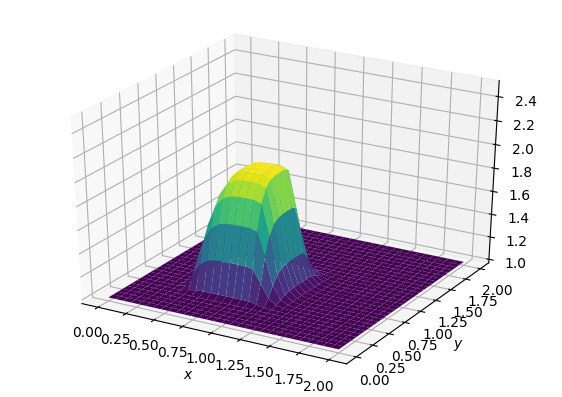

In [7]:
###variable declarations
nx = 31
ny = 31
nt = 120
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))

solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

X, Y = np.meshgrid(x, y)
fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

## Call Funtions

### Pure function

In [8]:
%timeit solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

1 loop, best of 5: 919 ms per loop


### Function with numba accelerator

In [9]:
%timeit solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu)

The slowest run took 595.42 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 1.91 ms per loop


### Function with pyccel accelerator

In [10]:
solve_2d_burger_f90 = epyccel(solve_2d_burger_pyccel)

In [11]:
%timeit solve_2d_burger_f90(u, un, v, vn, nt, dt, dx, dy, nu)

1000 loops, best of 5: 952 µs per loop
